# Predicting sentiment from product reviews


In [1]:
import numpy as np
import pandas as pd

# Read some product review data

Loading reviews for a set of baby products. 

In [2]:
products = pd.read_csv('amazon_baby.csv')

# Let's explore this data together

Data includes the product name, the review text and the rating of the review. 

In [3]:
products.head(10)

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5
6,A Tale of Baby\'s Days with Peter Rabbit,"Lovely book, it\'s bound tightly so you may no...",4
7,"Baby Tracker&reg; - Daily Childcare Journal, S...",Perfect for new parents. We were able to keep ...,5
8,"Baby Tracker&reg; - Daily Childcare Journal, S...",A friend of mine pinned this product on Pinter...,5
9,"Baby Tracker&reg; - Daily Childcare Journal, S...",This has been an easy way for my nanny to reco...,4


# Quick data cleaning

In [4]:
def cleanNaN(value):
    if pd.isnull(value):
        return ""
    else:
        return value

products['review'] = products['review'].apply(cleanNaN)

# Build the word count vector for each review

In [5]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183531 entries, 0 to 183530
Data columns (total 3 columns):
name      183213 non-null object
review    183531 non-null object
rating    183531 non-null int64
dtypes: int64(1), object(2)
memory usage: 4.2+ MB


In [6]:
# from nltk.tokenize import RegexpTokenizer
# from collections import Counter
# def wcount(text):
#     if pd.isnull(text):
#         return ""
#     cnt = Counter()
#     tokenizer = RegexpTokenizer(r'\w+')
#     tokens = tokenizer.tokenize(text)
#     for word in tokens:
#         cnt[word]+=1
#     return dict(cnt)
# products['word_count']=products.review.apply(lambda x: wcount(x)) 

In [7]:
############## !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!sklearn.feature_extraction.text
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
vect = CountVectorizer()
features = vect.fit_transform(products['review'])

In [9]:
type(features)

scipy.sparse.csr.csr_matrix

In [10]:
# import nltk
# nltk.download()
# products['review-tokenize'] = products.review.apply(nltk.word_tokenize)

In [11]:
features.shape

(183531, 68032)

There are about 68k words.
Let's look at the first 20 features (the words). Note that the u' just means Python is internally representing each word as a unicode string.

In [12]:
vect.get_feature_names()[0:20]

['00',
 '000',
 '0001',
 '000ft',
 '000importer',
 '000sqft',
 '001',
 '001cm',
 '00am',
 '00amcreepy',
 '00cons',
 '00dollars',
 '00etwhile',
 '00not',
 '00pm',
 '01',
 '01262',
 '016sc01',
 '01992',
 '01p']

Let's see how many times the word "colorful" appears:

In [13]:
vect.vocabulary_.get(u'colorful')

14110

# Examining the reviews for most-sold product:  'Vulli Sophie the Giraffe Teether'

In [14]:
giraffe_reviews = products[products['name'] == 'Vulli Sophie the Giraffe Teether']

In [15]:
len(giraffe_reviews)

785

In [16]:
products['rating'].value_counts()

5    107054
4     33205
3     16779
1     15183
2     11310
Name: rating, dtype: int64

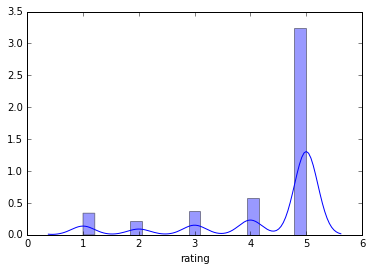

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns#####################！！！！！！！！！！！！！！！！！！！！！！！！！
sns.distplot(giraffe_reviews['rating'])

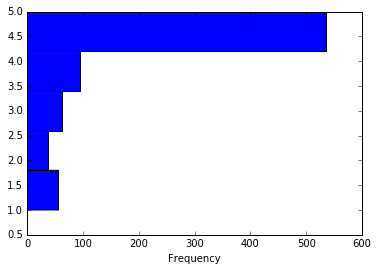

In [18]:
giraffe_reviews['rating'].plot(y='rating', orientation='horizontal', kind='hist', bins=5)

Examine the ratings for all the reviews we have:

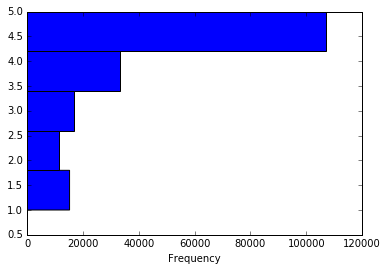

In [19]:
products['rating'].plot(y='rating', orientation='horizontal', kind='hist', bins=5)

# Build a sentiment classifier

In [20]:
# products['rating'].show(view='Categorical')

## Define what's a positive and a negative sentiment

We will ignore all reviews with rating = 3, since they tend to have a neutral sentiment.  Reviews with a rating of 4 or higher will be considered positive, while the ones with rating of 2 or lower will have a negative sentiment.   

In [21]:
products=products[products.rating!=3]

In [22]:
#positive sentiment = 4* or 5* reviews
products['sentiment'] = products['rating'] >=4#to change true false to 0 1 just multiply by 1

In [23]:
products.head()

,name,review,rating,sentiment
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,True
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,True
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,True
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,True
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,True


## Let's train the sentiment classifier

In [24]:
products.sentiment.value_counts()

True     140259
False     26493
Name: sentiment, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [26]:
X=products['review']
y=products['sentiment']

In [27]:
# train_data,test_data = products.random_split(.8, seed=0)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)

In [28]:
print(X_train.shape,X_test.shape)

(133401,) (33351,)


In [29]:
# sentiment_model = graphlab.logistic_classifier.create(train_data,
#                                                      target='sentiment',
#                                                      features=['word_count'],
#                                                      validation_set=test_data)

In [30]:
# instantiate the vectorizer
vect = CountVectorizer()

In [31]:
# learn training data vocabulary, then create document-term matrix
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_train_dtm

<133401x57276 sparse matrix of type '<class 'numpy.int64'>'
	with 7058761 stored elements in Compressed Sparse Row format>

In [32]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<33351x57276 sparse matrix of type '<class 'numpy.int64'>'
	with 1771113 stored elements in Compressed Sparse Row format>

In [33]:
logreg = LogisticRegression()
logreg.fit(X_train_dtm, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
# print(logreg.predict_proba(X_test_dtm)[1])

In [35]:
# class predictions and predicted probabilities
y_pred_class = logreg.predict(X_test_dtm)
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]

In [36]:
y_pred_class.shape

(33351,)

# Evaluate the sentiment model!!!!!!!!!!!!!!!!!!!!

By looking at its accuracy and its area under the curve score:

In [37]:
# calculate accuracy and AUC
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred_class))
print (metrics.roc_auc_score(y_test, y_pred_prob))

0.929627297532
0.952413193604


And the confusion matrix:

In [38]:
print (metrics.confusion_matrix(y_test, y_pred_class))

[[ 3886  1476]
 [  871 27118]]


# Applying the learned model to understand sentiment for Giraffe


Let's see if we can predict the review for the 785 giraffe teether. We first need to transform each review into a document term matrix. We can reuse the vectorizer from earlier since the giraffe reviews were included the last time we used it. Otherwise we could end up with words in the giraffe review that did not exist when we vectorized the corpus of words -- not good.

In [39]:
# Vectorize each giraffe review
giraffe_vect_dtm = vect.transform(giraffe_reviews['review'])
giraffe_vect_dtm

<785x57276 sparse matrix of type '<class 'numpy.int64'>'
	with 36614 stored elements in Compressed Sparse Row format>

In [40]:
giraffe_reviews['predicted_sentiment'] = logreg.predict(giraffe_vect_dtm)

In [41]:
giraffe_reviews['predicted_sentiment'] = logreg.predict_proba(giraffe_vect_dtm)[:, 1]

In [42]:
giraffe_reviews.head()

,name,review,rating,predicted_sentiment
34313,Vulli Sophie the Giraffe Teether,He likes chewing on all the parts especially t...,5,0.998636
34314,Vulli Sophie the Giraffe Teether,My son loves this toy and fits great in the di...,5,0.999225
34315,Vulli Sophie the Giraffe Teether,There really should be a large warning on the ...,1,0.203425
34316,Vulli Sophie the Giraffe Teether,All the moms in my moms\' group got Sophie for...,5,0.961098
34317,Vulli Sophie the Giraffe Teether,I was a little skeptical on whether Sophie was...,5,0.740171


##Sort the reviews based on the predicted sentiment and explore

In [43]:
giraffe_reviews = giraffe_reviews.sort_values(by='predicted_sentiment', ascending=False)

In [44]:
giraffe_reviews.head()

,name,review,rating,predicted_sentiment
34892,Vulli Sophie the Giraffe Teether,"Sophie, oh Sophie, your time has come. My gran...",5,1.0
34434,Vulli Sophie the Giraffe Teether,My Mom-in-Law bought Sophie for my son when he...,5,1.0
34515,Vulli Sophie the Giraffe Teether,"As every mom knows, you always want to give yo...",5,1.0
34975,Vulli Sophie the Giraffe Teether,My 8 week old LOVES Sophie. The rubber feels s...,5,1.0
34442,Vulli Sophie the Giraffe Teether,"Yes, it\'s imported. Yes, it\'s expensive. And...",5,1.0


In [45]:
giraffe_reviews.tail()

,name,review,rating,predicted_sentiment
34860,Vulli Sophie the Giraffe Teether,This children\'s toy is nostalgic and very cut...,1,1.757787e-04
34748,Vulli Sophie the Giraffe Teether,"My daughter loves Sophie, but we received her ...",2,8.986218e-05
34732,Vulli Sophie the Giraffe Teether,Received the product and smells like cheap rub...,1,8.103065e-05
34556,Vulli Sophie the Giraffe Teether,"Alright, first off didn\'t realize this was a ...",2,6.900003e-05
34687,Vulli Sophie the Giraffe Teether,I wanted to love this product and was excited ...,1,3.911931e-09


##Most positive reviews for the giraffe

In [46]:
giraffe_reviews.iloc[0,:]['review']

"Sophie, oh Sophie, your time has come. My granddaughter, Violet is 5 months old and starting to teeth. What joy little Sophie brings to Violet. Sophie is made of a very pliable rubber that is sturdy but not tough. It is quite easy for Violet to twist Sophie into unheard of positions to get Sophie into her mouth. The little nose and hooves fit perfectly into small mouths, and the drooling has purpose. The paint on Sophie is food quality.Sophie was born in 1961 in France. The maker had wondered why there was nothing available for babies and made Sophie from the finest rubber, phthalate-free on St Sophie\\'s Day, thus the name was born. Since that time millions of Sophie\\'s populate the world. She is soft and for babies little hands easy to grasp. Violet especially loves the bumpy head and horns of Sophie. Sophie has a long neck that easy to grasp and twist. She has lovely, sizable spots that attract Violet\\'s attention. Sophie has happy little squeaks that bring squeals of delight fro

##Show most negative reviews for giraffe

In [47]:
giraffe_reviews.iloc[-1,:]['review']

'I wanted to love this product and was excited to buy it when I became pregnant but am now hesitant to let my baby use it after reading about the recall in Europe. Apparently, as I understand it, their toxin standards of measurement are lower than ours so they have not been recalled here (apparently we are OK with low levels of nitrates in the toys our children put in their mouths, but Europeans are not...hmmm)...Be that as it may, toxins registering even CLOSE to a dangerous level made me nervous about using. After digging around online I did discover that the company claims to have changed the product after a certain date and lists manufacturing codes so you can check yours (those listed were made after a certain date and are said to be safer). Sadly mine was not made after the &#34;improved&#34; date but I could not return it because there was no formal recall in our country. I considered returning it and hunting for one with an approved manufacturing date but man that was just too 

# Assignments

# Out of the 11 words in selected_words, which one is most/least used in the reviews in the dataset?

In [48]:
products = pd.read_csv('amazon_baby.csv')
products=products[products.rating!=3]

In [49]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 
                  'bad', 'terrible', 'awful', 'wow', 'hate']

In [50]:
from nltk.tokenize import RegexpTokenizer
from collections import Counter
def wcount(text):
    if pd.isnull(text):
        return ""
    cnt = Counter()
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    for word in tokens:
        cnt[word]+=1
    return dict(cnt)
products['word_count']=products.review.apply(lambda x: wcount(x)) 

In [51]:
def word_count(w,words):
    if w in words:
        return words[w]
    else:
        return 0

In [52]:
for i in selected_words:
    products[i]=products['word_count'].apply(lambda x: word_count(i,x))


In [53]:
products['sentiment'] = products['rating'] >=4

In [54]:
products.head(10)

,name,review,rating,word_count,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate,sentiment
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,"{'it': 3, 'came': 1, 'early': 1, 'and': 3, 'wa...",0,0,0,0,1,0,0,0,0,0,0,True
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,"{'Very': 1, 'soft': 1, 'and': 2, 'comfortable'...",0,0,0,0,0,0,0,0,0,0,0,True
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,"{'This': 1, 'is': 4, 'a': 2, 'product': 2, 'we...",0,0,0,0,2,0,0,0,0,0,0,True
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,"{'All': 1, 'of': 1, 'my': 1, 'kids': 2, 'have'...",0,1,0,0,0,0,0,0,0,0,0,True
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,"{'When': 1, 'the': 5, 'Binky': 3, 'Fairy': 3, ...",0,1,0,0,0,0,0,0,0,0,0,True
6,A Tale of Baby\'s Days with Peter Rabbit,"Lovely book, it\'s bound tightly so you may no...",4,"{'Lovely': 1, 'book': 2, 'it': 2, 's': 1, 'bou...",0,0,0,0,0,0,0,0,0,0,0,True
7,"Baby Tracker&reg; - Daily Childcare Journal, S...",Perfect for new parents. We were able to keep ...,5,"{'Perfect': 1, 'for': 2, 'new': 1, 'parents': ...",0,0,0,0,0,0,0,0,0,0,0,True
8,"Baby Tracker&reg; - Daily Childcare Journal, S...",A friend of mine pinned this product on Pinter...,5,"{'A': 1, 'friend': 1, 'of': 2, 'mine': 1, 'pin...",0,0,1,0,0,0,0,0,0,0,0,True
9,"Baby Tracker&reg; - Daily Childcare Journal, S...",This has been an easy way for my nanny to reco...,4,"{'This': 1, 'has': 1, 'been': 2, 'an': 1, 'eas...",0,0,0,0,0,0,0,0,0,0,0,True
10,"Baby Tracker&reg; - Daily Childcare Journal, S...",I love this journal and our nanny uses it ever...,4,"{'I': 7, 'love': 2, 'this': 2, 'journal': 1, '...",0,0,0,0,2,0,0,0,0,0,0,True


In [55]:
for i in selected_words:
    print("%s, %i"%(i, products[i].sum()))
#     print("%s : %i" % (word, products[word].sum())

awesome, 3189
great, 46903
fantastic, 1468
amazing, 2207
love, 33208
horrible, 956
bad, 4010
terrible, 998
awful, 589
wow, 109
hate, 984




# In what range is the accuracy of the selected_words_model /predicted_sentiment_model on the test_data?


In [56]:
X1=products.iloc[:,4:-1]
y1=products['sentiment']

In [57]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=.2,random_state=0)
X_train1.shape

(133401, 11)

In [58]:
logreg1 = LogisticRegression()
logreg1.fit(X_train1, y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
# class predictions and predicted probabilities
y_pred_class1 = logreg1.predict(X_test1)
y_pred_prob1 = logreg1.predict_proba(X_test1)[:, 1]

In [60]:
print(y_pred_prob1)

[ 0.80587519  0.80587519  0.80587519 ...,  0.80587519  0.80587519
  0.80587519]


In [61]:
# calculate accuracy and AUC
from sklearn import metrics
print (metrics.accuracy_score(y_test1, y_pred_class1))
print (metrics.roc_auc_score(y_test1, y_pred_prob1))

0.843393001709
0.65680618734


In [62]:
print(logreg1.coef_)
print(logreg1.intercept_)

[[ 1.09238011  0.75799302  0.81233941  1.02261953  1.31668672 -2.1968707
  -0.94416068 -2.07474209 -1.97347508 -0.49782027 -1.3858462 ]]
[ 1.42342755]


# In what range is the ‘predicted_sentiment’ for the most positive review for ‘Baby Trend Diaper Champ’ according to the sentiment_model from the IPython Notebook from lecture?

In [63]:
bb=products[products.name=='Baby Trend Diaper Champ']

In [64]:
bb.shape

(298, 16)

In [65]:
X_bb=bb.review
y_bb=bb.sentiment

In [66]:
# y_pred_class_bb = logreg.predict(vect.transform(X_bb))
y_pred_prob_bb = logreg.predict_proba(vect.transform(X_bb))
y_pred_prob_bb.max()

0.99999999962642061

In [67]:
zz=zip(bb.index,y_pred_prob_bb[:,1])
zz_d=dict(zz)
###################################get the key of the max value of a dictionary!!!!!!!!!!
max(zz_d, key=zz_d.get)

376

# Consider the most positive review for ‘Baby Trend Diaper Champ’ according to the sentiment_model from the IPython Notebook from lecture. Which of the following ranges contains the predicted_sentiment for this review, if we use the selected_words_model to analyze it?

In [68]:
data=y_pred_prob_bb[:,1]
bb.loc[:,'prob1']=data

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [69]:
bb.sort_values(by='prob1',inplace=True,ascending=False)
# copybb=bb.prob1.copy()
# copybb.sort_values(ascending=False)
bb.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,name,review,rating,word_count,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate,sentiment,prob1
376,Baby Trend Diaper Champ,"This is absolutely, by far, the best diaper pa...",5,"{'This': 1, 'is': 10, 'absolutely': 1, 'by': 1...",0,0,0,0,2,0,0,0,0,0,0,True,1.0
320,Baby Trend Diaper Champ,I originally put this item on my baby registry...,5,"{'I': 10, 'originally': 1, 'put': 1, 'this': 3...",0,0,0,0,0,0,0,0,0,0,0,True,1.0
414,Baby Trend Diaper Champ,We have been using our Diaper Champ for almost...,5,"{'We': 2, 'have': 3, 'been': 2, 'using': 1, 'o...",0,0,0,0,0,0,0,0,0,0,0,True,1.0
571,Baby Trend Diaper Champ,We did alot of research on diaper pails before...,2,"{'We': 5, 'did': 1, 'alot': 1, 'of': 5, 'resea...",0,0,0,0,0,0,0,0,0,0,0,False,1.0
420,Baby Trend Diaper Champ,Baby Luke can turn a clean diaper to a dirty d...,5,"{'Baby': 1, 'Luke': 1, 'can': 1, 'turn': 1, 'a...",0,0,0,0,0,0,0,0,0,0,0,True,1.0


In [70]:
y_pred_class_bb_max= logreg1.predict_proba(bb.loc[[376]].iloc[:,4:-2])
y_pred_class_bb_max

array([[ 0.01700994,  0.98299006]])

In [71]:
y_pred_class_bb_max= logreg1.predict_proba(bb.loc[[420]].iloc[:,4:-2])
y_pred_class_bb_max

array([[ 0.19412481,  0.80587519]])

In [72]:
print(products.loc[[420]]['review'].all())

Baby Luke can turn a clean diaper to a dirty diaper in 3 seconds flat. The diaper champ turns the smelly diaper into "what diaper smell" in less time than that. I hesitated and wondered what I REALLY needed for the nursery. This is one of the best purchases we made. The champ, the baby bjorn, fluerville diaper bag, and graco pack and play bassinet all vie for the best baby purchase.Great product, easy to use, economical, effective, absolutly fabulous.UpdateI knew that I loved the champ, and useing the diaper genie at a friend\'s house REALLY reinforced that!! There is no comparison, the chanp is easy and smell free, the genie was difficult to use one handed (which is absolutly vital if you have a little one on a changing pad) and there was a deffinite odor eminating from the genieplus we found that the quick tie garbage bags where the ties are integrated into the bag work really well because there isn\'t any added bulk around the sealing edge of the champ.


# How do you compare the different learned models with the baseline approach where we are just predicting the majority class?

In [73]:
y_test1.value_counts()


True     27989
False     5362
Name: sentiment, dtype: int64

In [74]:
print(27989/(27989+5362))

0.8392252106383616
